# <a id='intro'></a>
## Introduction

### For my project, I am going to analyse the TMDb movie data set. This dataset contains about 10,000 movies collected from The Movie Database (TMDb). A quick scan of the dataset csv file can show us that it has about 10,000 rows and 21 columns. I can also notice that some columns have null values for example release_date column. 



# Questions

### Some questions I asked myself are, ''Which year produced the highest release of movies?'' and ''Which movie genre is the produced the highest and lowest number of movies?'' These questions are going to help me explore the data in depth. 


In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [29]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

# In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.



In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [31]:
# types and look for instances of missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [32]:
#show the rows and columns of the dataset 
df.shape

(10866, 21)

In [33]:
# values of missing data per column 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [34]:
df.duplicated().sum()

1

# Data Cleaning

## Here we remove information that we don't need to use during our analysis
 

In [35]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#drop the duplicated rows 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [36]:
#drop the columns that I will not use in my analysis
df.drop(columns = ['imdb_id', 'homepage', 'production_companies', 'tagline', 'keywords'], inplace=True)
df.shape

(10865, 16)

In [37]:
#check missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [38]:
#handle missing values by filling in missing values with the previous valid value in the dataset 
df.fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
overview          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [39]:
#change date format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
overview          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 1.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

## Here we Compute statistics and create visualizations with the goal of addressing the research questions at the Introduction section.


### Research Question 1 - Which year produced the highest release of movies?

In [41]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#group data by release-year column then find the totals in terns of the id
df_movies = df.groupby('release_year').count()['id']
df_movies.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

Text(0,0.5,'Number of Movies')

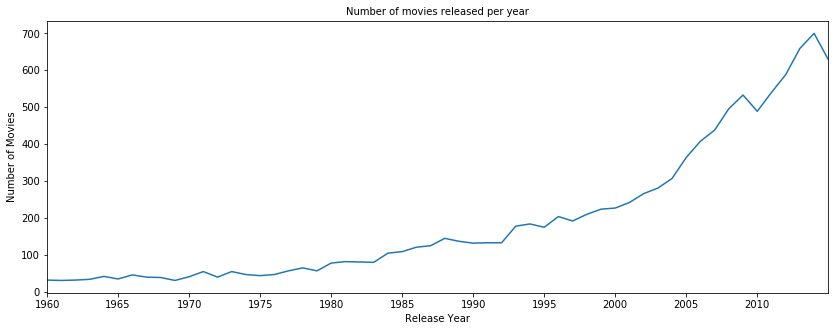

In [42]:
#plot the data for viusalisation 
df_movies.plot(xticks = np.arange(1960,2015,5), figsize = (14,5))
plt.title("Number of movies released per year", fontsize = 10)
plt.xlabel("Release Year", fontsize = 10)
plt.ylabel("Number of Movies", fontsize = 10)

From the line graph above, it is evident that 2014 had the highest release of number of movies wit a total of 700. It is also important to note that the number of movies released per year increased with time. 

### Research Question 2 - Which movie genre is the produced the highest and lowest number of movies?

In [43]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# some entries in the genre column contain multiple entries. We will split the out the rows then return count of each 
df_genre = df
# columns to split by "|"
df_genre['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [44]:
# Confirm for split
df_genre.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [45]:
#we use groupby to group the genre column then find total number of each movie and also sort by descending order
df_genre = df.groupby(['genres']).count()['id'].sort_values(ascending=False)
df_genre

genres
Drama              2459
Comedy             2324
Action             1591
Horror              916
Adventure           586
Thriller            492
Documentary         433
Animation           404
Crime               382
Fantasy             272
Science Fiction     216
Romance             186
Family              145
Mystery             125
Music               100
TV Movie             79
War                  59
History              44
Western              43
Foreign               9
Name: id, dtype: int64

Text(0,0.5,'Number of Movies')

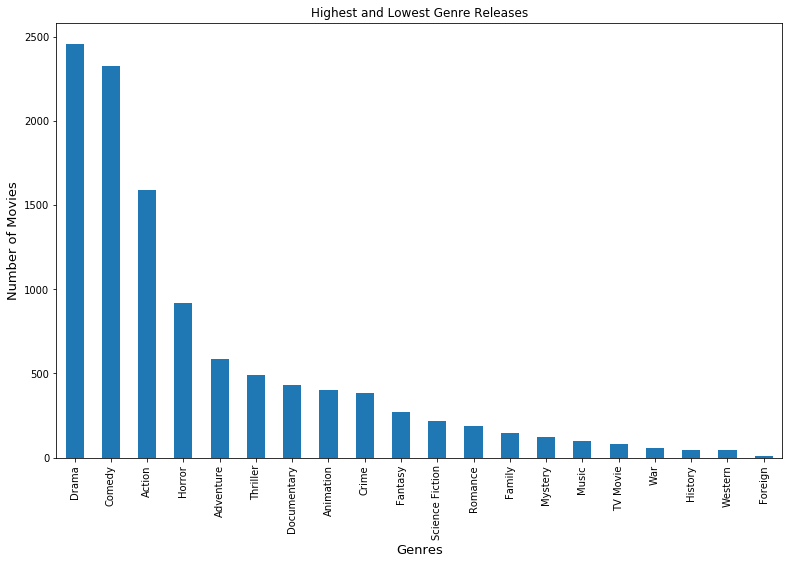

In [49]:
#visualization 
df_genre.plot(kind = 'bar', figsize = (13,8))
plt.title('Highest and Lowest Genre Releases', fontsize = 12)
plt.xlabel('Genres', fontsize = 13)
plt.ylabel('Number of Movies', fontsize = 13)

From the bar graph plotted above, we can notice that drama genre released the highest number of movies with a total of 2459. Coming in with the least releases is Foreign genre with a total of 9. 

<a id='conclusions'></a>
## Conclusions

# After careful analysis of this dataset, we can finally answer or questions. The year 2014 produced the highest release of movies. In addition to that, we can also see that the graph is skewed to the right meaning the release of movies increased as the years went by. 

# Drama Genre produced the highest number of movies while Foreign goes in with the least number of movies produced. 

# Limitations 
# During cleaning, We filled up some of the missing data in columns such as the genre column. This might the validity of the results we accrued. 



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0